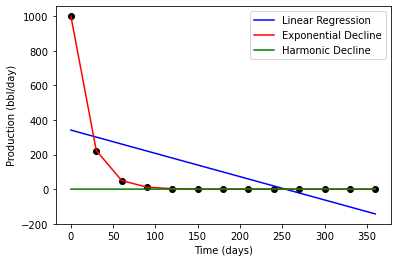

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create updated sample production data
time = np.array(range(0, 365, 30)).reshape(-1, 1)
production = 1000 * np.exp(-0.05 * time[:, 0])

# Fit a linear regression model to the data
linear_model = LinearRegression()
linear_model.fit(time, production)

# Fit an exponential decline model to the data
exp_model = np.polyfit(time[:, 0], np.log(production), 1)
exp_fit = np.exp(exp_model[1]) * np.exp(exp_model[0] * time[:, 0])

# Fit a harmonic decline model to the data
harmonic_model = np.polyfit(time[:, 0], 1 / production, 1)
harmonic_fit = 1 / (harmonic_model[0] * time[:, 0] + harmonic_model[1])

# Plot the data and the fitted models
plt.scatter(time, production, color="black")
plt.plot(time, linear_model.predict(time), label="Linear Regression", color="blue")
plt.plot(time, exp_fit, label="Exponential Decline", color="red")
plt.plot(time, harmonic_fit, label="Harmonic Decline", color="green")
plt.xlabel("Time (days)")
plt.ylabel("Production (bbl/day)")
plt.legend()
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

# Get the URLs of all pages on the domain
def get_page_urls(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    page_urls = []
    for link in soup.find_all("a"):
        page_url = link.get("href")
        if page_url and page_url.startswith(url):
            page_urls.append(page_url)
    return page_urls

# Get the text from all pages on the domain
def get_page_text(urls):
    text = ""
    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        text += soup.get_text()
    return text

# Generate a word cloud in the shape of an oil barrel
def generate_wordcloud(text):
    mask = np.array(Image.open("oil_barrel.png"))
    wordcloud = WordCloud(mask=mask, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Main function
def main():
    url = "http://www.daylightpetroleum.com"
    page_urls = get_page_urls(url)
    text = get_page_text(page_urls)
    generate_wordcloud(text)

# Run the main function
if __name__ == "__main__":
    main()